<a href="https://colab.research.google.com/github/Nhatnguyen2001/AI_Exercise/blob/main/CNN_FOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow import keras
import os
import pickle
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.preprocessing import  image

In [2]:
#Ket noi voi google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
#Link Train va test
train_path = '/content/drive/MyDrive/Colab Notebooks/BTVN_CNN/MonAn'

In [6]:
path_img = []
labels = ['BanhMi','Banhcuon','Banhtrangnuong','BunBo','Bunthitnuong','Comtam','Goicuon','HuTieu','Miquang','Pho']
x_train = []
y_train = []
x_test = []
y_test =[]
# Tao dataset
for i in labels:
  path = os.path.join(train_path,i)
  index_label = labels.index(i)
  for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(300,300)) # độ phân giải tùy ae chọn nhé!
      img = img_to_array(img)
      img = img.reshape(300,300,3) #hàm reshape phải có cùng độ phân giải với target_size của nhé
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)

# xử lí dữ liệu
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)

In [7]:
#Thiet Lap Model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(300, 300, 3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 720000)            0         
                                                                 
 dense (Dense)               (None, 256)               184320256 
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 184,323,722
Trainable params: 184,323,722
Non-trainable params: 0
__________________________________________

In [8]:
#Complie Model 
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

In [9]:
#Training Model 
history = model.fit(x_train,y_train,epochs = 20)

Epoch 1/20
4/4 [==============================] - 12s 99ms/step - loss: 3.3236 - accuracy: 0.0800
Epoch 2/20
4/4 [==============================] - 0s 70ms/step - loss: 4.3514 - accuracy: 0.1000
Epoch 3/20
4/4 [==============================] - 0s 67ms/step - loss: 0.5526 - accuracy: 0.1800
Epoch 4/20
4/4 [==============================] - 0s 69ms/step - loss: 0.4403 - accuracy: 0.3100
Epoch 5/20
4/4 [==============================] - 0s 67ms/step - loss: 0.3272 - accuracy: 0.3800
Epoch 6/20
4/4 [==============================] - 0s 69ms/step - loss: 0.2681 - accuracy: 0.5100
Epoch 7/20
4/4 [==============================] - 0s 68ms/step - loss: 0.2393 - accuracy: 0.6800
Epoch 8/20
4/4 [==============================] - 0s 69ms/step - loss: 0.2006 - accuracy: 0.8700
Epoch 9/20
4/4 [==============================] - 0s 71ms/step - loss: 0.1615 - accuracy: 0.9200
Epoch 10/20
4/4 [==============================] - 0s 69ms/step - loss: 0.1337 - accuracy: 0.9300
Epoch 11/20
4/4 [===========

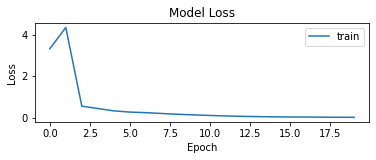

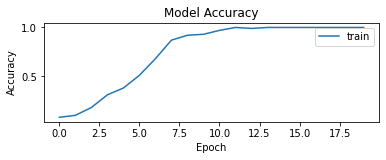

In [10]:
#Ve Do thi Loss
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()
#Ve Do thi Accuracy
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

Day la BanhMi


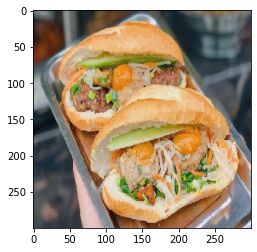

In [17]:
img = image.load_img('/content/BanhMi_8.jpg', target_size=(300,300)) 
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,300,3) 
img = img.astype('float32')
img = img/255
print('Day la '+ labels[np.argmax(model.predict(img))])

Day la Banhcuon


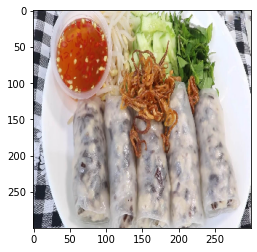

In [18]:
img1 = image.load_img('/content/Banhcuon_10.jpg', target_size=(300,300)) 
plt.imshow(img1)
img1 = img_to_array(img1)
img1 = img1.reshape(1,300,300,3) 
img1 = img1.astype('float32')
img1 = img1/255
print('Day la '+ labels[np.argmax(model.predict(img1))])

Day la Banhtrangnuong


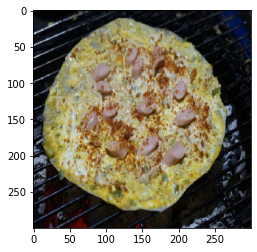

In [19]:
img2 = image.load_img('/content/Banhtrangnuong_10.jpg', target_size=(300,300)) 
plt.imshow(img2)
img2 = img_to_array(img2)
img2 = img2.reshape(1,300,300,3) 
img2 = img2.astype('float32')
img2 = img2/255
print('Day la '+ labels[np.argmax(model.predict(img2))])